# STATISTICAL QUANTITIES FOR WIND ENGINEERING

### Description : Wind data (Measured/Simulated) in Wind engineering is in general recorded as a time series. Typical quantities measured are velocity at a reference height or pressure measured at locations of interest along the structure. Here, in this excercise,  a time series is generated and analysed. Various statistical quantities introduced in the lecture are demonstrated for a generated signal and some excercises are proposed.  

Project:Lecture - Structural Wind Engineering WS18-19 
        Chair of Structural Analysis @ TUM - A. Michalski, R. Wuchner, M. Pentek
        
Author : kodakkal.anoop@tum.de mate.pentek@tum.de

In [1]:
# import
import numpy as np
from matplotlib import pyplot as plt
from OwnFunctionDef import*

#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [2]:
# start time
startTime = 0.0
# end time
endTime = 10.0
# steps 
n = 10000
# time step
dTime = endTime / (n-1)
# time instances
# generate grid size vectors 1D
arrayTime = np.arange(startTime, endTime+dTime, dTime)

#### Generating signals in Time Domain

#####  Three signals are created. 
1. A Harmonic (cosine) signal with given amplitude and frequency
2. A constant signal with given amplitude
3. A random signal with specified distribution and given properties

###### 1. Cosine signal with given amplitude and frequency 

In [3]:
freq = 10
amplCos = 1
signalCos = amplCos * np.cos( 2*np.pi* freq * arrayTime)

###### Let's look at the plot to see how the signal look like

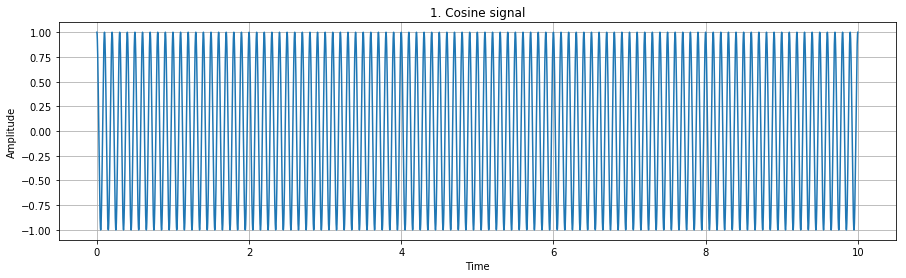

In [4]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalCos)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('1. Cosine signal')
plt.grid(True)

### Excercise 01 : Try differant frequencies 

Try diffrent frequencies for the harmonic function. What is the relation between frequency and time period ? what do you observe in the plots?

###### 2. Constant signal with given amplitude

In [5]:
amplConst = 10
signalConst = amplConst * np.ones(len(arrayTime))

###### Let's look at the plot to see how the signal look like

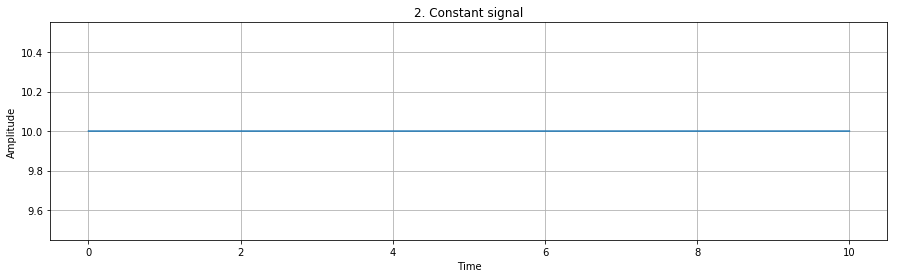

In [6]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalConst)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('2. Constant signal')
plt.grid(True)

###### 3. Random signal with specified distribution and given properties

In [7]:
# normal random signal with given mean m = 0 and standard dev sd = 0.25 ->
signalRand = np.random.normal(0, 0.25, len(arrayTime))


###### Let's look at the plot to see how the signal look like

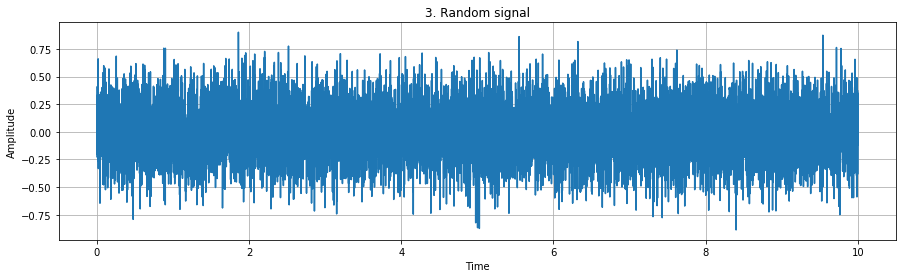

In [8]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalRand)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('3. Random signal')
plt.grid(True)

### Excercise 02 : Different distributions and parameters for random signal 

Instead of the [normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) distribution for the random signal try [lognormal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html), [beta](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html), [standard normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) and [uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) distribution

In [9]:
#signalRand = np.random.lognormal(0, 0.25, len(arrayTime))
#signalRand = np.random.beta(1, 0.25, len(arrayTime))
#signalRand = np.random.rand(len(arrayTime))
#signalRand = np.random.uniform(0,1,len(arrayTime))

#### 4. General signal - superposition of the above three signals


A general signal is represented as a superposition of the above three - constant, cosine and random signals

###### Superposed signal

The above three signals are superposed with corresponding weights

In [10]:
coefSignal1 = 1
coefSignal2 = 0.25
coefSignal3 = 1
signalSuperposed = coefSignal1 * signalConst + coefSignal2 * signalCos + coefSignal3 * signalRand

###### Let's look at the plot to see how the signal look like

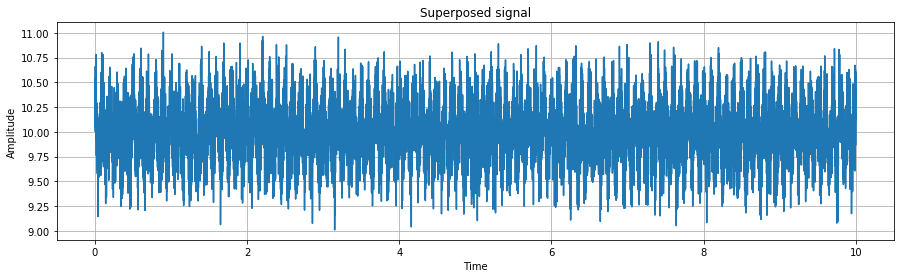

In [11]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalSuperposed)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Superposed signal')
plt.grid(True)

### Excercise 03 : Different weights for superposition

Try diffrent weights for the superpoistion. What do you observe in the plots ?

Try diffrent frequencies for the cosine function and observe the difference in the superposed signal

## Statistical tools and quantities used to evaluate the signal

##### The following statistical quantities are computed for the given signal. 
1. Mean (Arithmatic) 
2. Root Mean Square (RMS)
3. Median 
4. Standard deviation
5. Skewness


Recall from the lecture the definitions of these quantities. 
These quantites can be computed using the inbuilt functions of numpy
[Mean (Arithmatic)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
[Median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html)
[Standard deviation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy.std)
and
[Skewness](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html)


###### 1. Cosine signal with given amplitude and frequency 

In [12]:
signalCosMean = np.mean(signalCos) * np.ones(len(arrayTime))
signalCosSTD = np.std(signalCos) * np.ones(len(arrayTime))
signalCosRMS = np.sqrt(np.mean(np.square(signalCos)))  * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalCos))
print('STD: ',np.std(signalCos))
print('RMS: ',np.sqrt(np.mean(np.square(signalCos))))
print('Median: ',np.median(signalCos))
print('Skewness: ',(np.mean(signalCos) - np.median(signalCos))/np.std(signalCos))


Mean:  9.99999999999968e-05
STD:  0.7071421285710532
RMS:  0.7071421356417675
Median:  0.00015709533381615863
Skewness:  -8.074095929136108e-05


###### 2. Constant signal with given amplitude

In [13]:
signalConstMean = np.mean(signalConst) * np.ones(len(arrayTime))
signalConstSTD = np.std(signalConst) * np.ones(len(arrayTime))
signalConstRMS = np.sqrt(np.mean(np.square(signalConst))) * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalConst))
print('STD: ',np.std(signalConst))
print('RMS: ',np.sqrt(np.mean(np.square(signalConst))))
print('Median: ',np.median(signalConst))
print('Skewness: ',(np.mean(signalConst) - np.median(signalConst))/np.std(signalConst))

Mean:  10.0
STD:  0.0
RMS:  10.0
Median:  10.0
Skewness:  nan


/home/kodakkal/Software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


###### 3. Random signal with specified distribution and given properties

In [14]:
signalRandMean = np.mean(signalRand) * np.ones(len(arrayTime))
signalRandSTD = np.std(signalRand) * np.ones(len(arrayTime))
signalRandRMS = np.sqrt(np.mean(np.square(signalRand))) * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalRand))
print('STD: ',np.std(signalRand))
print('RMS: ',np.sqrt(np.mean(np.square(signalRand))))
print('Median: ',np.median(signalRand))
print('Skewness: ',(np.mean(signalRand) - np.median(signalRand))/np.std(signalRand))

Mean:  -0.0010853245003029424
STD:  0.24876493764763044
RMS:  0.24876730519121767
Median:  -0.004267216346973236
Skewness:  0.012790756915982133


#### Superposed signal


In [15]:
signalSuperposedMean = np.mean(signalSuperposed) * np.ones(len(arrayTime))
signalSuperposedSTD = np.std(signalSuperposed) * np.ones(len(arrayTime))
signalSuperposedRMS = np.sqrt(np.mean(np.square(signalSuperposed))) * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalSuperposed))
print('STD: ',np.std(signalSuperposed))
print('RMS: ',np.sqrt(np.mean(np.square(signalSuperposed))))
print('Median: ',np.median(signalSuperposed))
print('Skewness: ',(np.mean(signalSuperposed) - np.median(signalSuperposed))/np.std(signalSuperposed))

Mean:  9.998939675499697
STD:  0.30695085251674287
RMS:  10.003650006879626
Median:  10.000308701221744
Skewness:  -0.00446008118505694


###### What does the Mean, Median, Mode, RMS value, Standard deviation, and Skewness physically mean?  

### Histogram of the signals

The variation of each signal with time and their histograms are plotted

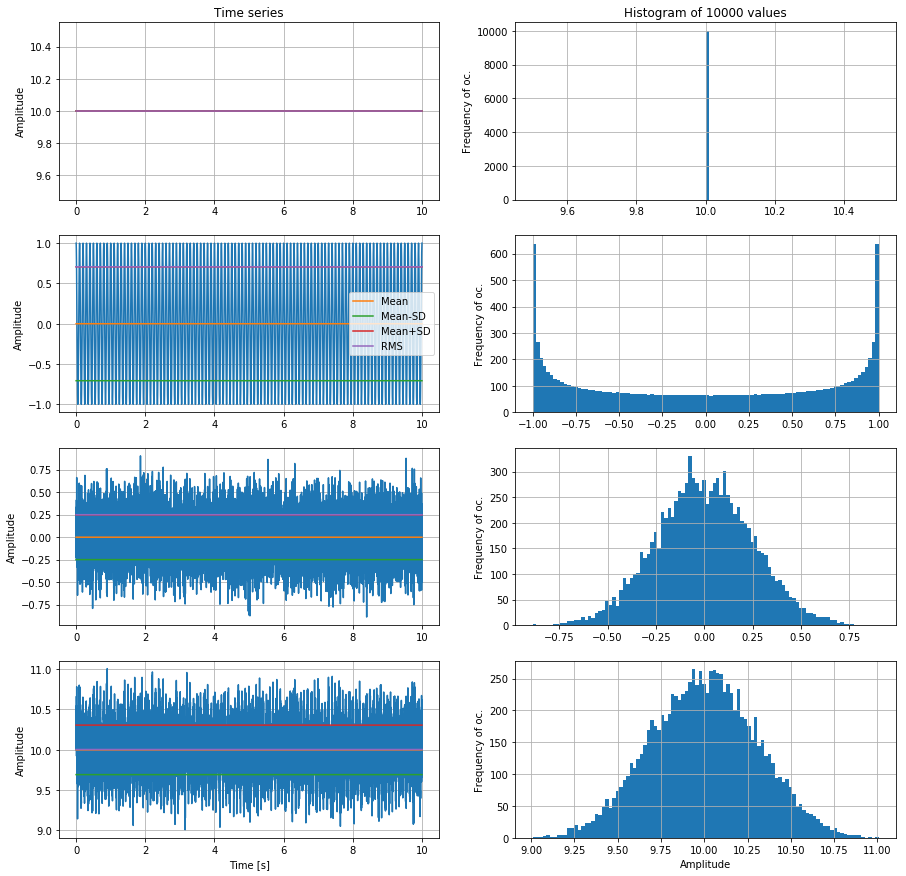

In [16]:
plt.rcParams["figure.figsize"] = (15,15)
plt.figure(1)
# const
plt.subplot(4, 2, 1)
plt.plot(arrayTime,signalConst,
         arrayTime,signalConstMean,
         arrayTime,signalConstMean-signalConstSTD,
         arrayTime,signalConstMean+signalConstSTD,
         arrayTime,signalConstRMS)
plt.ylabel('Amplitude')
plt.title('Time series')
plt.grid(True)

bins = 100
plt.subplot(4, 2, 2)
plt.hist(signalConst,bins)
plt.title('Histogram of ' + str(n) +' values')
plt.ylabel('Frequency of oc.')
plt.grid(True)

# cos
plt.subplot(4, 2, 3)
plt.plot(arrayTime,signalCos) 
plt.plot(arrayTime,signalCosMean,label = 'Mean') 
plt.plot(arrayTime,signalCosMean-signalCosSTD,label = 'Mean-SD') 
plt.plot(arrayTime,signalCosMean+signalCosSTD,label = 'Mean+SD') 
plt.plot(arrayTime,signalCosRMS,label = 'RMS') 
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 2, 4)
plt.hist(signalCos,bins)
plt.ylabel('Frequency of oc.')
plt.grid(True)

# rand
plt.subplot(4, 2, 5)
plt.plot(arrayTime,signalRand,
         arrayTime,signalRandMean,
         arrayTime,signalRandMean-signalRandSTD,
         arrayTime,signalRandMean+signalRandSTD,
         arrayTime,signalRandRMS)
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(4, 2, 6)
plt.hist(signalRand,bins)
plt.ylabel('Frequency of oc.')
plt.grid(True)

# superposed
plt.subplot(4, 2, 7)
plt.plot(arrayTime,signalSuperposed,
         arrayTime,signalSuperposedMean,
         arrayTime,signalSuperposedMean-signalSuperposedSTD,
         arrayTime,signalSuperposedMean+signalSuperposedSTD,
         arrayTime,signalSuperposedRMS)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.grid(True)

plt.subplot(4, 2, 8)
plt.hist(signalSuperposed,bins)
plt.ylabel('Frequency of oc.')
plt.xlabel('Amplitude')
plt.grid(True)

### Probability Distibution function (PDF) and Cummulative Distribution Function (CDF) 

The PDF and CDF of the signals are derived and are plotted later. Recall from the lecture the definition sof PDF, CDF of a continuos random variables

##### Tip: Have a look at the CalcForPDF function in the "OwnFunctionDef.py" for details 

In [17]:
# const
[pdfConstX,pdfConst] = CalcForPDF(signalConst,'Normal')

# cos
[pdfCosX,pdfCos] = CalcForPDF(signalCos)

# rand
[pdfRandX,pdfRand] = CalcForPDF(signalRand)

# superposed
[pdfSuperposedX,pdfSuperposed] = CalcForPDF(signalSuperposed)

### Convertinng to Frequency domain - Fast Fourier Transform  (FFT) 

FFT computes the frequency contents of the given signal. Recall from the lecture the basic defintions and procedure for FFT

##### Tip: Have a look at the CalcForFFT function in the "OwnFunctionDef.py"  for details 

In [18]:
# const
samplingFreq= (n-1)/endTime
[freqHalfConst,signalFFTConst] = CalcForFFT(signalConst,samplingFreq)

# cos
samplingFreq= (n-1)/endTime
[freqHalfCos,signalFFTCos] = CalcForFFT(signalCos,samplingFreq)

# rand
samplingFreq= (n-1)/endTime
[freqHalfRand,signalFFTRand] = CalcForFFT(signalRand,samplingFreq)

# superposed
samplingFreq= (n-1)/endTime 
[freqHalfSuperposed,signalFFTSuperposed] = CalcForFFT(signalSuperposed,samplingFreq)

Constant Signal


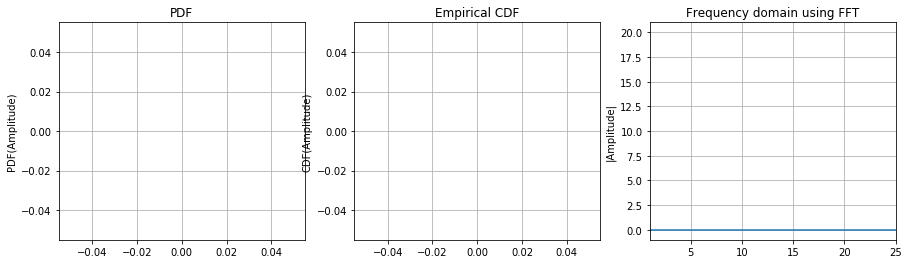

Cosine Signal


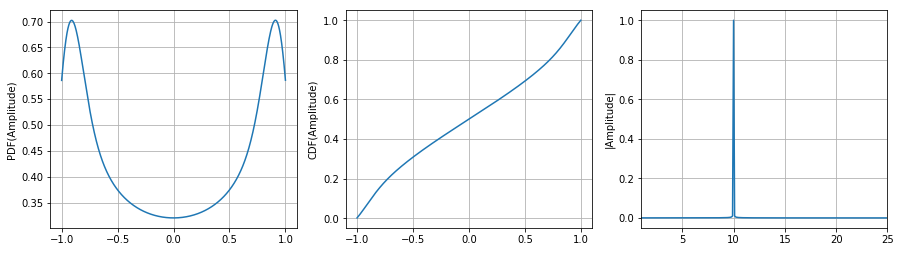

Random Signal


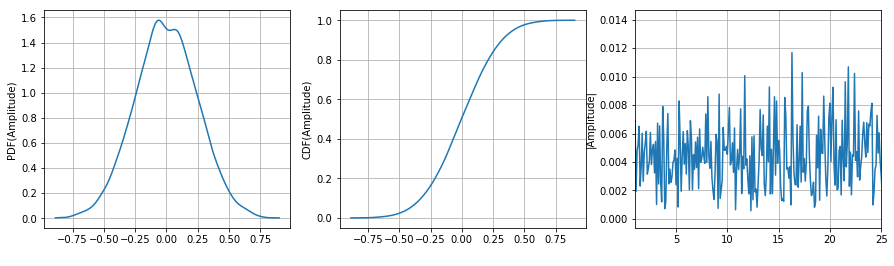

Superposed Signal


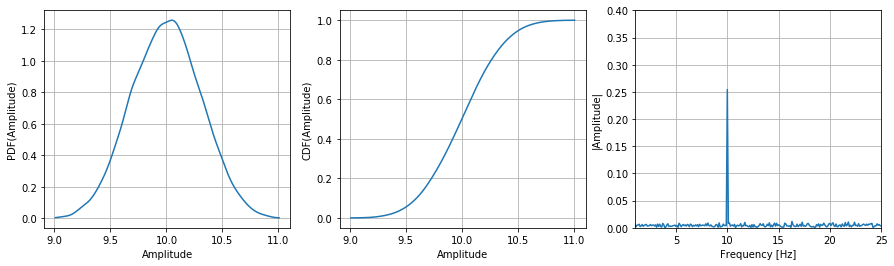

In [19]:
## pdf, cdf and frequency domain
print('Constant Signal')
plt.rcParams["figure.figsize"] = (15,4)
plt.figure(2)
# const
plt.subplot(1,3,1)
plt.plot(pdfConstX, pdfConst)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.title('PDF')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(pdfConstX,np.cumsum(pdfConst))
plt.ylabel('CDF(Amplitude)')
plt.title('Empirical CDF')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfConst,signalFFTConst)
plt.xlim([1, 25]);
plt.ylabel('|Amplitude|')
plt.title('Frequency domain using FFT')
plt.grid(True)
plt.show()


print('Cosine Signal')
plt.figure(2)
# cos
plt.subplot(1,3,1)
plt.plot(pdfCosX, pdfCos)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

ecdfCos = CalcForECDF(pdfCosX,pdfCos)

plt.subplot(1,3,2)
plt.plot(pdfCosX,ecdfCos)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfCos,signalFFTCos)
plt.xlim([1, 25]);
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

print('Random Signal')
# rand
plt.figure(3)
plt.subplot(1,3,1)
plt.plot(pdfRandX, pdfRand)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

ecdfRand = CalcForECDF(pdfRandX,pdfRand)

plt.subplot(1,3,2)
plt.plot(pdfRandX,ecdfRand)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfRand,signalFFTRand)
plt.xlim([1, 25]);
plt.ylabel('|Amplitude|')
plt.grid(True)

plt.show()
# superposed

print('Superposed Signal')
plt.figure(4)
plt.subplot(1,3,1)
plt.plot(pdfSuperposedX, pdfSuperposed)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

ecdfSuperposed = CalcForECDF(pdfSuperposedX,pdfSuperposed)

plt.subplot(1,3,2)
plt.plot(pdfSuperposedX,ecdfSuperposed)
plt.ylabel('CDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfSuperposed,signalFFTSuperposed)
plt.ylim([0, 0.4])
plt.xlim([1, 25])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

PDF follows the normalized hystograms. Observe the predominant frequency in the superimposed signal. 

### Excercise 04 : Try two or more harmonic function

Try Two or more cosine functions and superimpose them. What difference do you observe ?
What do you observe in the FFT plots? 

## Extreme value statistics

######  The two methods for extreme value analysis of the structure are Block Maxima(BM) and Peak over threshold (POT). Recall from the lecture the basic definitions and differences between these two parameters. 

The extreme value statistics of the generated superimposed signal generated earlier will be compurted in this section. 

#### Block Maxima (BM)

A window size is chosen in computation of BM. The signal will be divided into the given window size. the extrema is extracted at each of the window. The mean,sd and other statistics will be computed for the extremas. The window size is chosen in such a way that there are statistically significant number of extrema.  

In [20]:

blockSize = np.round(len(signalSuperposed)/20) #  /20 -> 5% parent size for around
# 0.2% from parent distribution to be in tails 
[indexBM,extremeValuesBM] = ExtractBM(signalSuperposed,blockSize)

##### Tip: Have a look at the ExtractBM function in the "OwnFunctionDef.py"  for details 

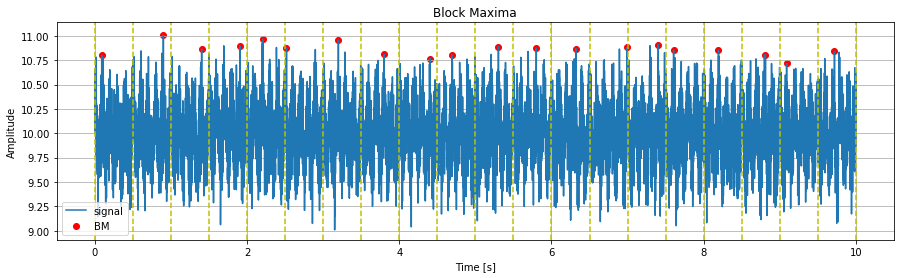

In [21]:
plt.plot(arrayTime,signalSuperposed,label  ='signal')
plt.scatter(arrayTime[indexBM],signalSuperposed[indexBM], marker = 'o', color = 'r', label='BM')
plt.ylabel('Amplitude')
plt.title('Block Maxima')
plt.xlabel('Time [s]')
for index in np.arange(len(indexBM)):
    plt.axvline(x=arrayTime[np.int(blockSize*index)], color='y',linestyle='--')
plt.axvline(x=arrayTime[-1], color='y',linestyle='--')
plt.legend()
plt.grid(True)

#### Peak Over Threshold (POT)

A prescribed threshold is set in the begining of the analysis. Every value exceding this predined threshold is considered an extrema.The threshold has to be decided in the begining of the analysis

In [25]:
signalMean = np.mean(signalSuperposed)
signalSTD = np.std(signalSuperposed)
thresholdParam = 3
thresholdValue = signalMean + thresholdParam * signalSTD # for around 0.25% from parent 
# distribution to be in tails 
[indexEndTimePOT,extremeValuesEndTimePOT] = ExtractPOT(signalSuperposed,thresholdValue)
print(thresholdValue)

10.919792233049925


Here, the threshold is set as mean plus 3 times dtandard deviation. For a normal distributed random variable this interval  $\mu +- \sigma$ is found to have 99.75% density inside. 

##### Tip: Have a look at the ExtractPOT function in the "OwnFunctionDef.py"  for details 

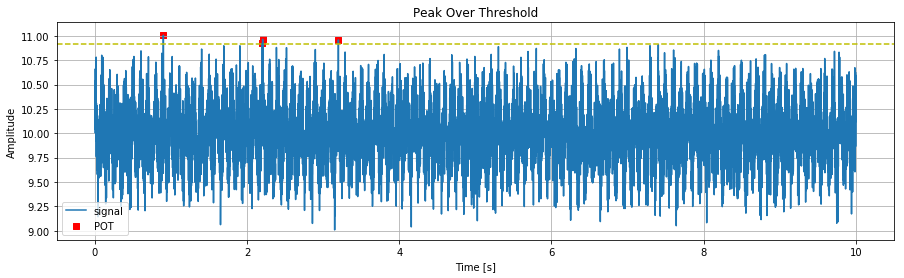

In [26]:
plt.plot(arrayTime,signalSuperposed, label = 'signal')
plt.scatter(arrayTime[indexEndTimePOT],signalSuperposed[indexEndTimePOT], marker ='s', color = 'r', label = 'POT')
plt.ylabel('Amplitude')
plt.title('Peak Over Threshold')
plt.axhline(y=thresholdValue,color='y',linestyle='--')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)